<a href="https://colab.research.google.com/github/donw385/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Don_Wang_Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()



(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
y = df['price']
X = df.drop(['price'], axis=1)

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [6]:
model = LinearRegression()
model.fit(X_train, Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [7]:
print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  1098.2829573   7886.89079148]

 Intercept:  -2184591.0115608736


## 1.5 Use the test data to make predictions

In [0]:
y_test_predict = model.predict(X_test)


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [19]:
MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('Root Mean Square Error is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

Root Mean Square Error is 22470.10563446866
R^2 is 0.2694482951962195


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

Increase in car value for every year increase in car model, with all else being equal. Using numbers, the model thats the predicted value of car value will increase by 1098.28 for every year increase (i.e. 2010 to 2011)   



## 1.8 How should we interpret the Root-Mean-Square Error?

 Measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.  It is the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences.
 
 This value is 22,470.

## 1.9 How should we interpret the $R^2$?

R^2  is the percentage of the dependent variable that is explained by the model.

In other words, the R^2 is the percentage of y that is explained by the x variables included in the model

In this case, 26.9% of the y values is explained by the x variables in the above dataset.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df['price'])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

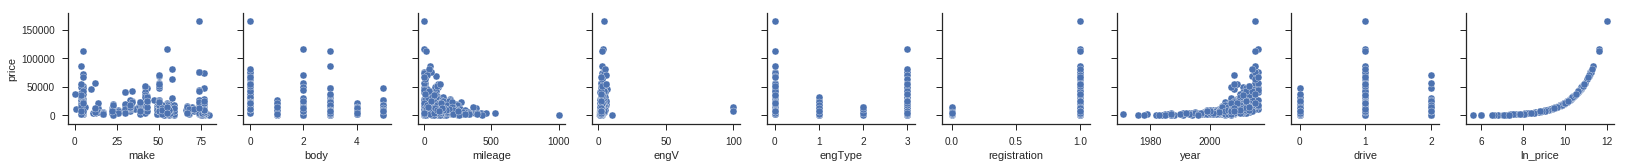

In [21]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('price','ln_price')

# Sample our dataframe to take 1/20th the values
sampled = df.sample(frac=0.05, replace=True)
# print(x_columns)

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=sampled, y_vars=['price'], x_vars=x_columns)

## 2.3 If appropriate, create any polynomial features. 

In [0]:
#year and mileage are not evenly distributed

df['year_squared'] = df['year']**2
df['mileage_squared'] = df['mileage']**2



## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [24]:
## Log-Linear Regression
# Separate dependent and independent variables
y = df.loc[:, ['ln_price']].values
X = df.loc[:, ['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'year_squared', 'mileage_squared']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.5555739782623862
R^2 is 0.6721433400179758
coefficients:  [-1.60668375e-03 -8.64387922e-02  9.84119698e-04  9.60759460e-03
 -4.80294292e-02  6.72177364e-01 -6.45583602e+00  3.83372383e-01
  1.63788682e-03 -6.05343073e-07]
intercepts:  [6367.88492351]


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

Coefficient represents growth rate in y, so an additional year leads to 0.16% increase in value

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

A cost function compares our hypothesis line to our actual y values and gives it a score based on how well our hypothesis function fits the data. 

Gradient Descent  finds model parameters that minimizes this cost function.

## 3.2 What is the "Learning Rate" and what is its function?

Learning rate is a hyper-parameter that controls how much to adjust the weights of our function with respect to the loss gradient. 

In simple terms, it is how big the steps we are taking to stepping to optimize the model.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [26]:
y = df['ln_price']
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'year_squared', 'mileage_squared']]

# Use Statsmodels to run a regression
# for robust SE, cov_type='HC3' parameter to .fit() function

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1693.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:55:29   Log-Likelihood:                -6963.9
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8484   BIC:                         1.403e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6524.4284    685.467     

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [27]:
# As a rule of thumb any variable that has a VIF > 10 needs to be dealt with, and signals that there are multicollinearity issues.

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'year_squared', 'mileage_squared'],
      dtype='object') 


[3417162393.281383, 1.0604357815123744, 1.1700158474025226, 7.512926111854284, 1.0105817507356412, 1.171764363539346, 1.1087266992866478, 164006.04096347353, 1.1404985918994788, 164341.01383629531, 5.067267264795855]


In [0]:
# In the data, year and year squared have extremely high VIFs of 164006 and 164341, so these 2 variables have multicollinearity issues.